**Project Name :** Book Recommendation System

**Project Objective:**

*   This project is all about recomendation system.
*   In this project we have tried to use some approches for recomending the  
    books to the readers or users.
*   We will be using various ways such as collaborative Filtering and Content based
    Filtering for recomendation of the books to the users .



    



**Dataset:**

*   We have three different datsets namely book.csv which contains information
    about the books such as book-author , publisher , book title , year of publication, image links and unique Book ID i.e ISBN Number .
*   Then we have ratings.csv which contain information about ratings given by
    the users for the books, it contains user ID ,ISBN number and book rating (scale between 1-10).
*   Then we have users.csv which contain information about users such as their
    location , age and their user ID.   






**Importing necessary libraries**

In [ ]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357275 sha256=6c3c520ecfd83293f6095384ebbdb07298e3eacda321e9c4137160519dedd0a7
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# for dealing with regular expression techniques
import re
import requests
import random
#for NLP related tasks
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# basic libraries
import pandas as pd
import numpy as np


import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#for TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
# for finding similarity
from sklearn.metrics.pairwise import cosine_similarity

import scipy
import math
import sklearn
#for removing stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#for SVD model
from scipy.sparse.linalg import svds
# for plotting graphs
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

**Loading the datasets**

In [ ]:
df_books=pd.read_csv('Books.csv', encoding='latin-1')
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
df_ratings=pd.read_csv('Ratings.csv', encoding='latin-1')
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
df_users=pd.read_csv('Users.csv', encoding='latin-1')
df_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


**Basic dataset information**

In [ ]:
df_books.info()
df_books.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
df_ratings.info()
df_ratings.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
df_users.info()
df_users.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


**Unique Values**

In [ ]:
df_books.nunique()

,0
ISBN,271360
Book-Title,242135
Book-Author,102022
Year-Of-Publication,202
Publisher,16807
Image-URL-S,271044
Image-URL-M,271044
Image-URL-L,271041


In [ ]:
df_ratings.nunique()

,0
User-ID,105283
ISBN,340556
Book-Rating,11


In [ ]:
df_users.nunique()

,0
User-ID,278858
Location,57339
Age,165


**Duplicate Values**

In [ ]:
print("Duplicate Values in BOOKS" ,len(df_books[df_books.duplicated()]))
print("Duplicate Values in RATINGS ",len(df_ratings[df_ratings.duplicated()]))
print("Duplicate Values in USERS",len(df_users[df_users.duplicated()]))

Duplicate Values in BOOKS 0
Duplicate Values in RATINGS  0
Duplicate Values in USERS 0


**Finding and handling missing values**

NULL Values in BOOKS ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


<Figure size 1000x600 with 0 Axes>

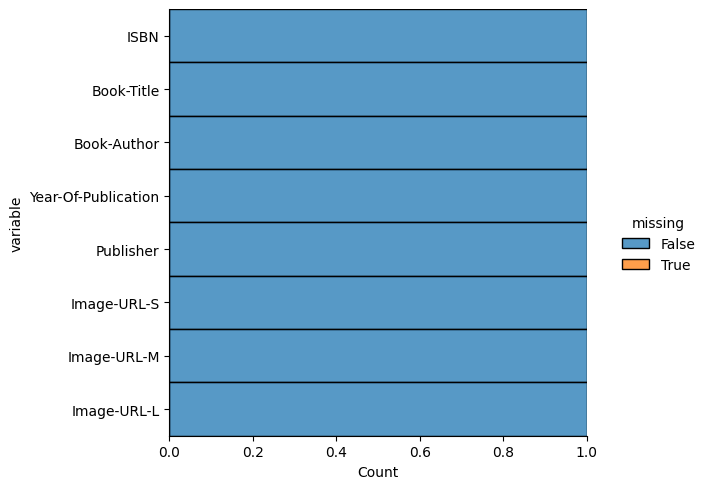

In [ ]:
print("NULL Values in BOOKS" ,df_books.isnull().sum())
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df_books.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

NULL Values in RATINGS  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

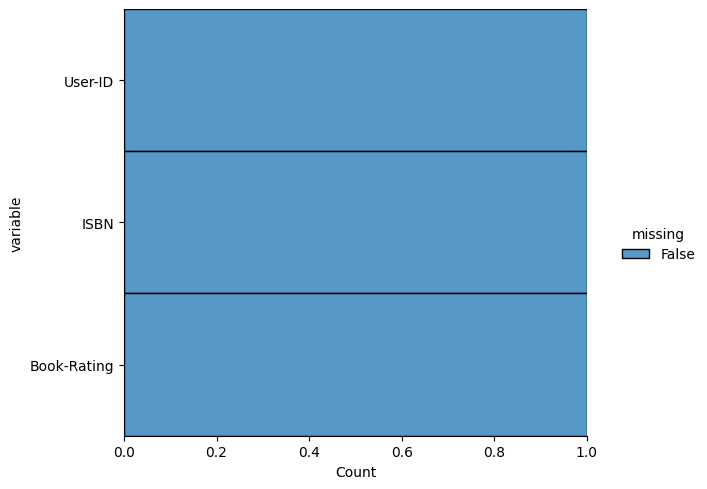

In [ ]:
print("NULL Values in RATINGS ",df_ratings.isnull().sum())
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df_ratings.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

NULL Values in USERS User-ID          0
Location         0
Age         110762
dtype: int64


<Figure size 1000x600 with 0 Axes>

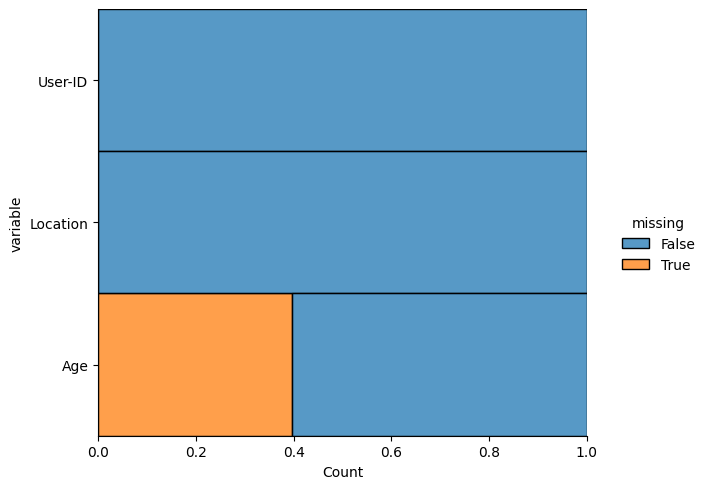

In [ ]:
print("NULL Values in USERS",df_users.isnull().sum())
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df_users.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

**Handling missing values**

In [ ]:
df_users["Age"].fillna(df_users.Age.median(),inplace=True)
print("NULL Values in USERS",df_users.isnull().sum())

NULL Values in USERS User-ID     0
Location    0
Age         0
dtype: int64


**Fixing wrong values**

In [ ]:
df_books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
# checking the data where the 'Year-Of-Publication' is 'DK Publishing Inc'
df_books.loc[df_books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
#Fixing the wrongly inputed values
#ISBN '0789466953'
df_books.loc[df_books.ISBN == '0789466953','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '0789466953','Book-Author'] = "James Buckley" # this we gathered from the google
df_books.loc[df_books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
df_books.loc[df_books.ISBN == '078946697X','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum" # this we gathered from the google
df_books.loc[df_books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [ ]:
# checking for the Gallimard
df_books.loc[df_books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
df_books.loc[df_books.ISBN == '2070426769','Year-Of-Publication'] = 2003
df_books.loc[df_books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.ISBN == '2070426769','Publisher'] = "Gallimard"
df_books.loc[df_books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [ ]:
df_books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
df_books["Book-Author"].fillna("other", inplace = True)
df_books["Publisher"].fillna("other", inplace = True)

**Handling Outliers**

<Axes: xlabel='Age'>

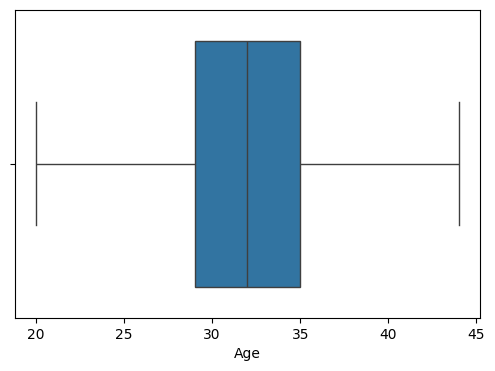

In [ ]:
# Handling Outliers & Outlier treatments
Q3,Q1 = np.percentile(df_users['Age'],[75,25])
#Calculating Inter Quartile Range
IQR = Q3-Q1
#Fixing Boundaries for outliers
max = Q3+(1.5*IQR)
min = Q1-(1.5*IQR)
df_users["Age"] = np.where(df_users["Age"] > max, max, df_users['Age'])
df_users["Age"] = np.where(df_users["Age"] < min, min, df_users['Age'])

# chceking the outliers again
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=df_users)

**Visualizations**

In [ ]:
# Merge the dataset

df_books_rating=df_books.merge(df_ratings,on="ISBN")
df_books_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [ ]:
# Dropping unnecessary columns

df_books_rating_copy=df_books_rating.copy()
# removing null values
df_books_rating_copy.dropna(inplace=True)
df_books_rating_copy.reset_index(drop=True,inplace=True)


# as the columns ISBN has no use for the analysis also Year-Of-publication
# we can also remove the medium and small scale of a image link i.e Image-URL-S and Image-URL-M
df_books_rating_copy.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)

# we can also drop the book details where the ratings is 0 as it is not a valid rating
df_books_rating_copy.drop(index=df_books_rating_copy[df_books_rating_copy["Book-Rating"]==0].index,inplace=True)

df_books_rating_copy["Book-Title"]=df_books_rating_copy["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df_books_rating_copy.head()

,Book-Title,Book-Author,Publisher,Image-URL-L,User-ID,Book-Rating
1,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
3,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,67544,8
8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,116866,9
9,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,123629,9


Text(0.5, 1.0, 'Top 20 author with number of books')

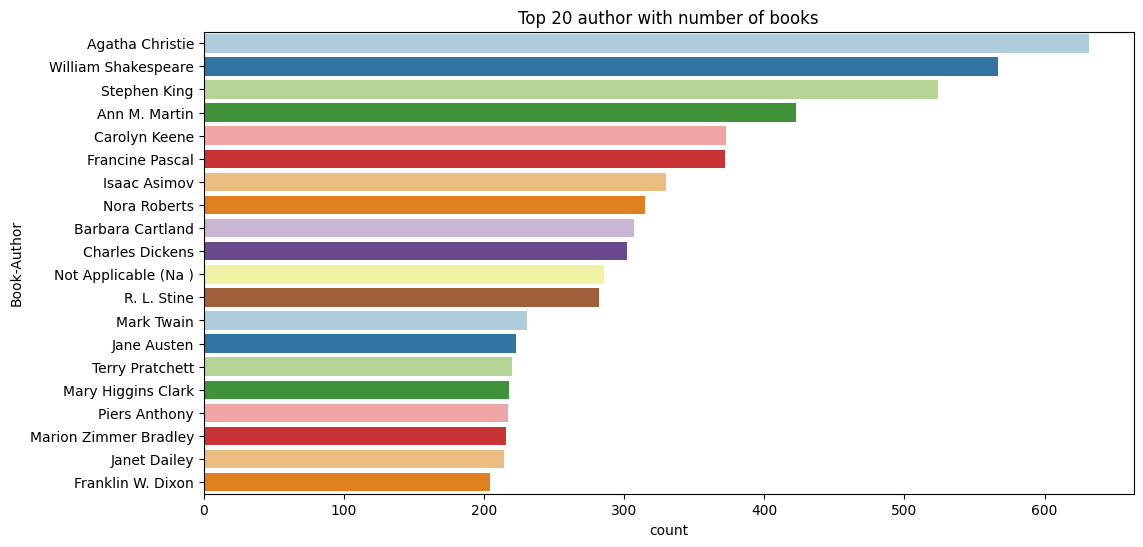

In [ ]:
# Chart - 1 Top 20 author with number of books
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=df_books,order=df_books['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Ratings')

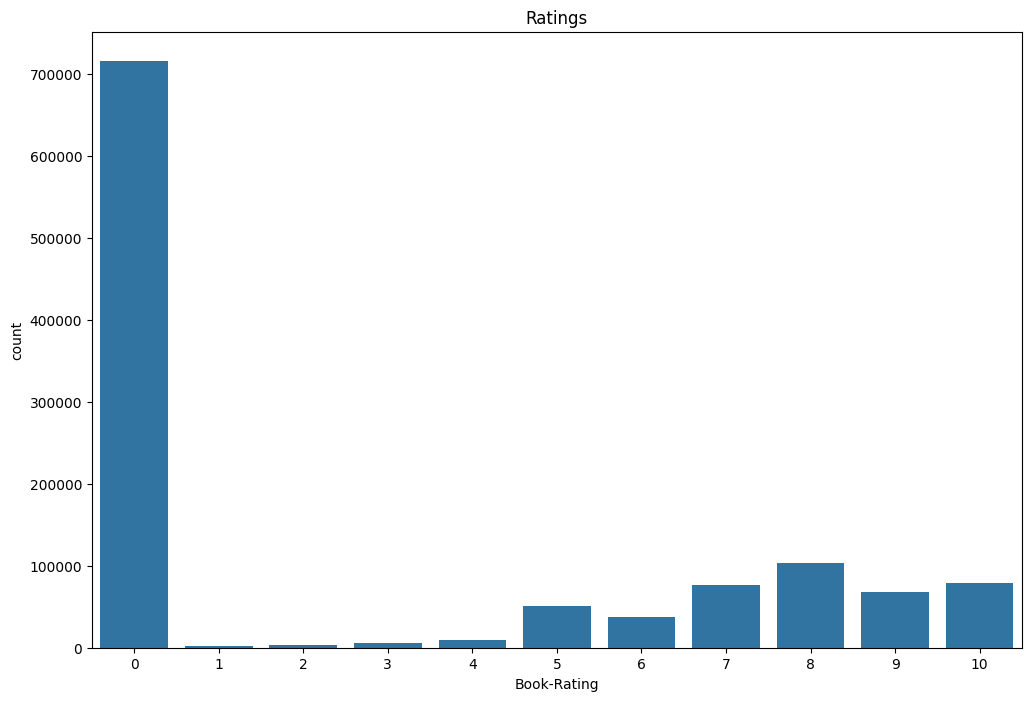

In [ ]:
# Chart - 2 Plotting the rating column distribusion
plt.figure(figsize=(12,8))
sns.countplot(x="Book-Rating", data=df_ratings)
plt.title("Ratings")

In [ ]:
# Finding percentage of books having 0 rating

Books_zero_rating = (len(df_books_rating[df_books_rating["Book-Rating"]==0])/len(df_books_rating))*100
print('Percentage of books with zero rating %0.2f' % Books_zero_rating)

Percentage of books with zero rating 62.77


In [ ]:
# Chart - 3 Top 10 Books with highest nuumber of ratings
valid_rating=df_ratings[df_ratings['Book-Rating'] != 0]
top10_ratings=valid_rating.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False).head(10)
top10_ratings

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333
0060928336,320
059035342X,313
0142001740,307
0446672211,295


Text(0.5, 1.0, 'Age Distribution Plot')

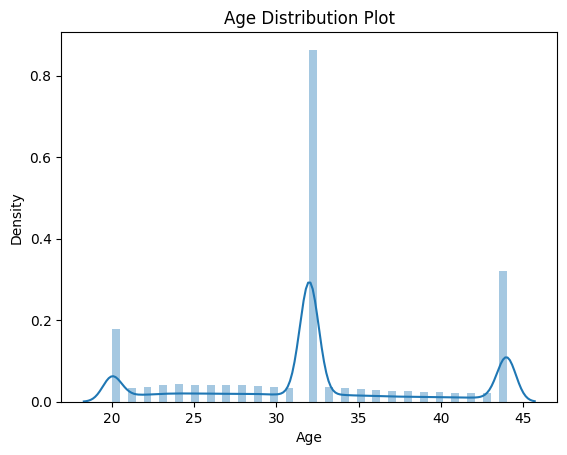

In [ ]:
# Chart - 4 User Age distribution
sns.distplot(df_users.Age)
plt.title('Age Distribution Plot')

<Axes: xlabel='Age'>

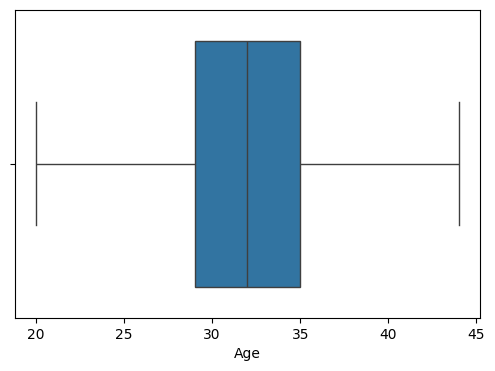

In [ ]:
# Chart - 5 Checking Outliers for the Users Age column
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=df_users)

Text(0.5, 1.0, 'Top 20 author with maximum number of rating')

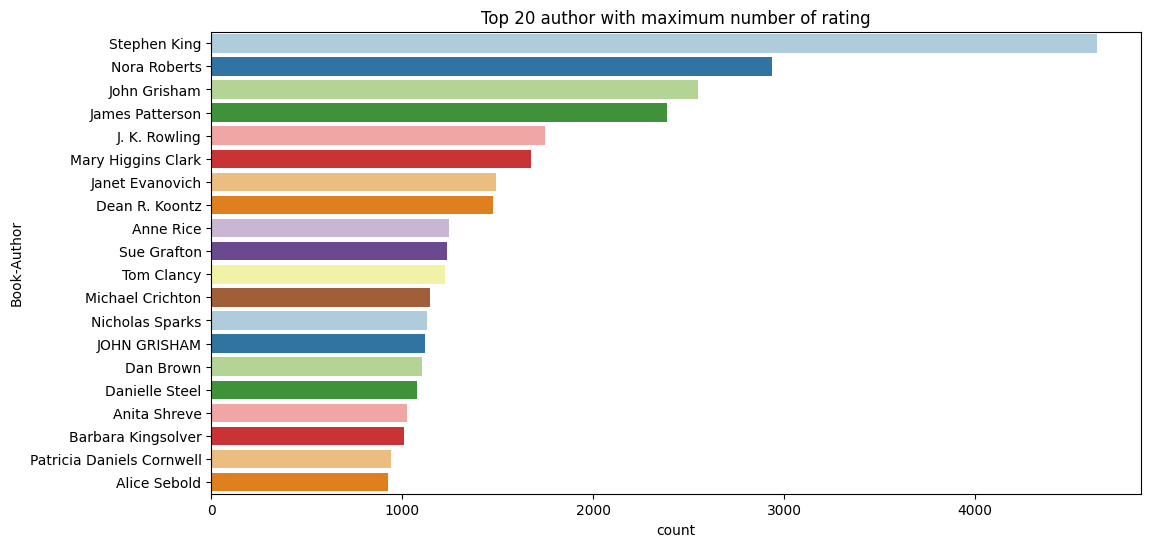

In [ ]:
# Chart - 6 Top 20 authors with maximum number of ratings
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=df_books_rating_copy,order=df_books_rating_copy['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with maximum number of rating")

<Axes: xlabel='Book-Title'>

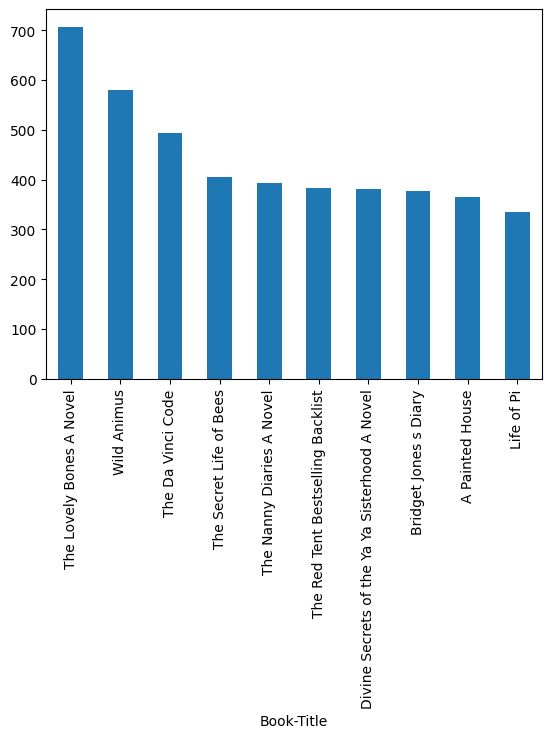

In [ ]:
# Chart - 7 Top 10 books which got highest numbers of rating
df_books_rating_copy.groupby(['Book-Title'])['Book-Rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

Text(0.5, 1.0, "Top 10 'Publisher' with maximum number of rating")

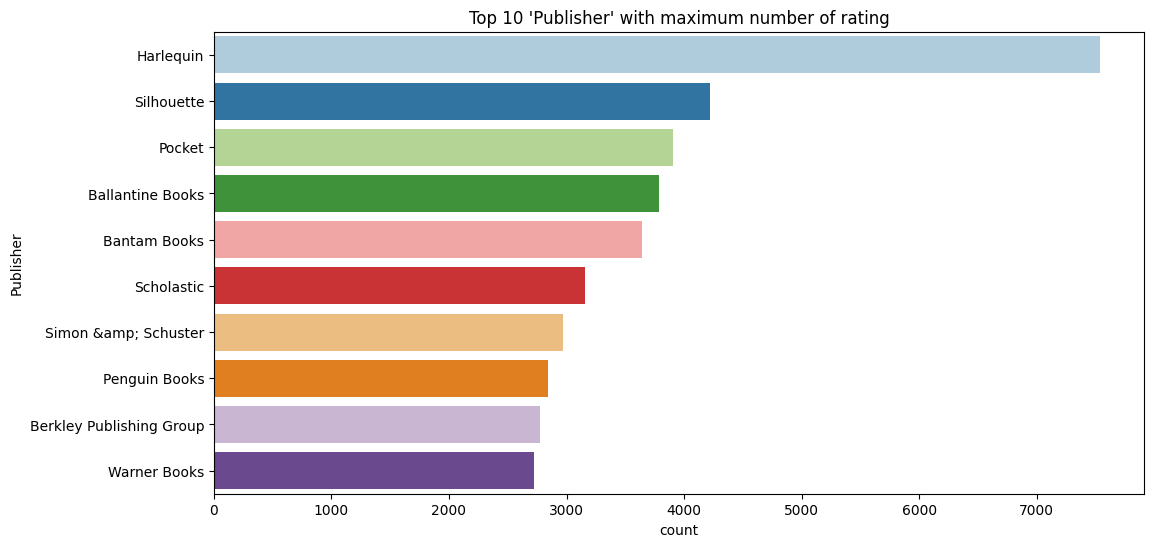

In [ ]:
# Chart - 8 Top 10 publishers with maximum number of ratings
plt.figure(figsize=(12,6))
sns.countplot(y='Publisher',palette = 'Paired', data=df_books,order=df_books['Publisher'].value_counts().index[0:10])
plt.title("Top 10 'Publisher' with maximum number of rating")

**EDA ANALYSIS**

1. Average age of users is between 34-35.
2. Average rating given by users is 2.8.
3. Outliers have been handled using IQR method.
4. Missing values have been handled by replacing data with median values.
5. Wrong data in wrong columns has been handled.
6. Hariequin, Silhouette and Pocket are the top 3 publishers.
7. Books like The Lovely Bone and Wild Animus are the 2 top rated books.
8. Stephen King, Nora Roberts and John Grisham are the top 3 authors.
9. Agatha Christie, William Shakespeare and Stephen King released maximum books.
10. 62.77 percent books have 0 rating.